In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from math import log10
from sympy.solvers import solve
from sympy import Symbol


Data = pd.read_csv('Dados-medicos.csv',delim_whitespace=True, usecols =[0,1,2,3], header=0)
Data.columns= ['Idade', "Peso", "Carga Final", "VO2 maximo"]
Color = ["Blue","Green", "Red", "Purple"]

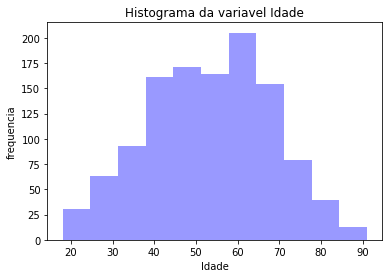

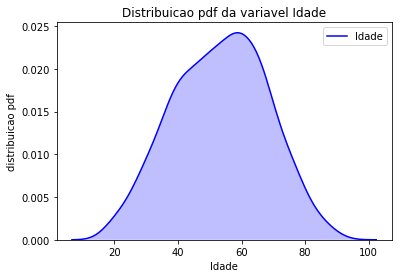

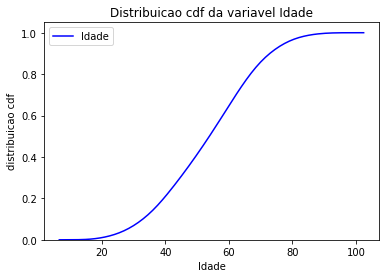

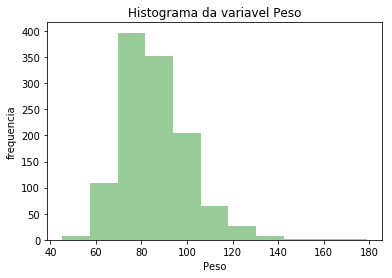

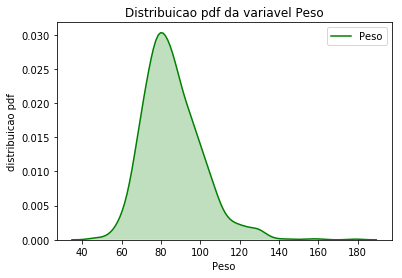

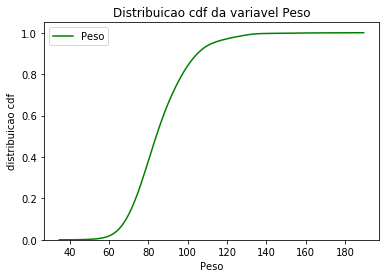

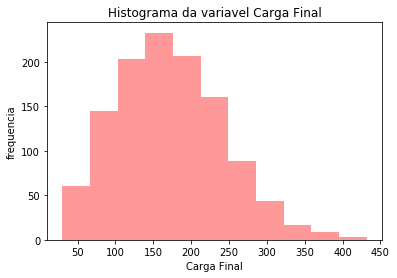

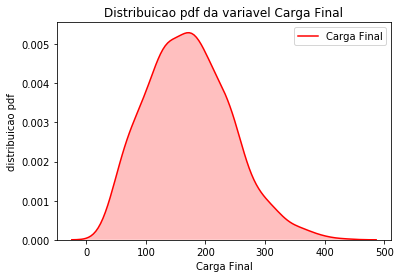

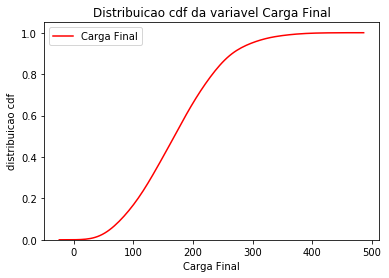

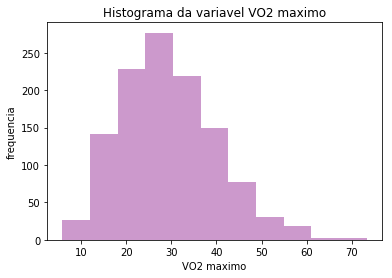

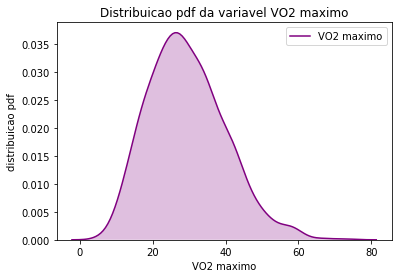

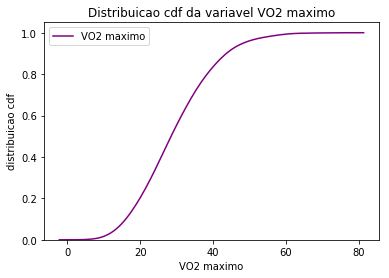

In [195]:
for i in range (0,4):
    x = Data.columns[i]
    count = Data[x].count()
    bin= 1+ 3.3* log10(count)
    
    sns.distplot(Data[x],int(bin),color=Color[i], rug=False,kde=False)
    plt.title('Histograma da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('frequencia')
    plt.savefig('Histograma da variavel '+x)
    plt.show()
    
    
    sns.kdeplot(Data[x],color=Color[i], shade=True)
    plt.title('Distribuicao pdf da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao pdf')
    plt.savefig('Distribuicao pdf da variavel '+x)
    plt.show()
    
    sns.kdeplot(Data[x],color=Color[i], cumulative=True)
    plt.title('Distribuicao cdf da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao cdf')
    plt.savefig('Distribuicao cdf da variavel '+x)
    plt.show()
    
    print("\n\n")
    
    


Variavel:  Idade
Media:  53.29095563139932
Desvio Padrao:  14.746296966880656
Variancia:  217.45327423543367


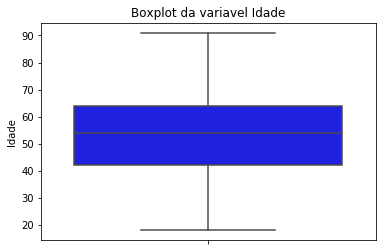




Variavel:  Peso
Media:  85.92577645051195
Desvio Padrao:  14.799113384059629
Variancia:  219.0137569542528


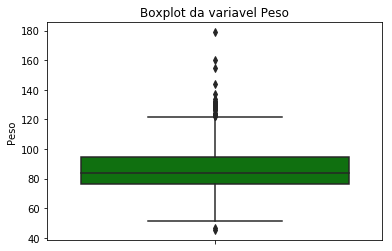




Variavel:  Carga Final
Media:  172.27150170648466
Desvio Padrao:  70.093123662472
Variancia:  4913.0459847625925


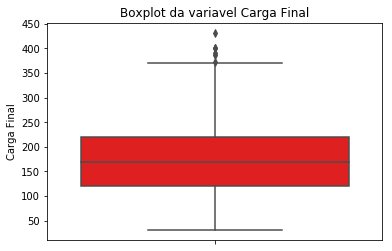




Variavel:  VO2 maximo
Media:  29.39472792315316
Desvio Padrao:  10.49724989342601
Variancia:  110.1922553250324


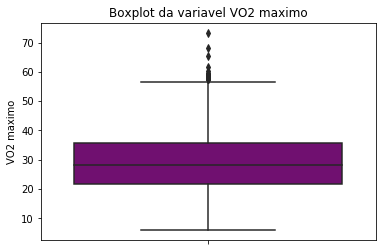

In [196]:
for i in range (0,4):
    x = Data.columns[i]
    print ("Variavel: ",x)
    print ("Media: ", Data[x].mean())
    print ("Desvio Padrao: ", Data[x].std())
    print ("Variancia: ", Data[x].var())
    sns.boxplot(y=x,data=Data,color=Color[i])
    plt.title('Boxplot da variavel '+x)
    plt.savefig('Boxplot da variavel '+x)
    plt.show()
    print("\n\n")

Idade 

Lambda da exponencial:  0.018764910258257682 

Mu da gaussiana:  53.29095563139932
Sigma ao quadrado da gaussiana:  217.45327423543367 

Mu da lognormal:  3.932509819486875
Sigma ao quadrado da lognormal:  0.0936331955793438 

Constante da Weibull:  4.089481828645864
loc da Weibull:  0
Scale da Weibull:  58.78289005707875 



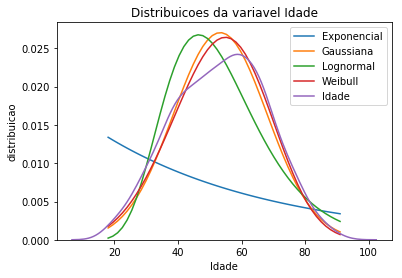




Peso 

Lambda da exponencial:  0.011637951279683105 

Mu da gaussiana:  85.92577645051195
Sigma ao quadrado da gaussiana:  219.0137569542528 

Mu da lognormal:  4.439451920143028
Sigma ao quadrado da lognormal:  0.027586997105752877 

Constante da Weibull:  5.408013188534343
loc da Weibull:  0
Scale da Weibull:  92.24080850317551 



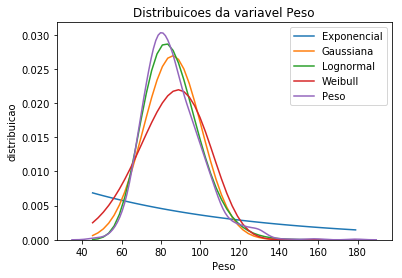




Carga Final 

Lambda da exponencial:  0.005804790636258545 

Mu da gaussiana:  172.27150170648466
Sigma ao quadrado da gaussiana:  4913.0459847625925 

Mu da lognormal:  5.0546544058509895
Sigma ao quadrado da lognormal:  0.2103368574854832 

Constante da Weibull:  2.6469810001574725
loc da Weibull:  0
Scale da Weibull:  194.0388415799269 



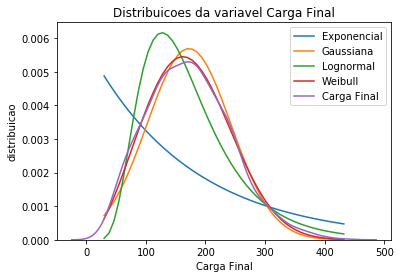




VO2 maximo 

Lambda da exponencial:  0.03401970593551017 

Mu da gaussiana:  29.39472792315316
Sigma ao quadrado da gaussiana:  110.1922553250324 

Mu da lognormal:  3.3132400746591215
Sigma ao quadrado da lognormal:  0.14364411960908474 

Constante da Weibull:  2.9978221690896216
loc da Weibull:  0
Scale da Weibull:  32.9274599599628 



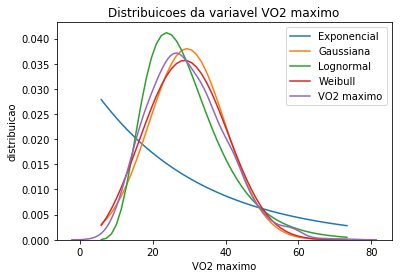

In [197]:
for i in range(0,4):
    x= Data.columns[i]
    intervalo = np.linspace(Data[x].min(),Data[x].max())
    print(x, "\n")
    
    #Exponencial
    exponencial_lambda = 1/Data[x].mean()
    exponencial= exponencial_lambda* np.exp(-(exponencial_lambda*intervalo))
    plt.plot(intervalo,exponencial, label ="Exponencial")
    print("Lambda da exponencial: ", exponencial_lambda, "\n")

    
    #gaussiana
    gaussiana_mu= Data[x].mean()
    gaussiana_sigma2=Data[x].var()
    gaussiana =(1/(np.sqrt(2*np.pi*gaussiana_sigma2)))* np.exp((-1/2)*((intervalo-gaussiana_mu)**2)/gaussiana_sigma2)
    plt.plot(intervalo, gaussiana, label="Gaussiana")
    print("Mu da gaussiana: ", gaussiana_mu)
    print("Sigma ao quadrado da gaussiana: ", gaussiana_sigma2, "\n")
    
    #lognormal

    lognormal_mu= np.sum(np.log(Data[x]))/Data[x].count()
    lognormal_sigma2= np.sum((np.log(Data[x])-lognormal_mu)**2)/Data[x].count()
    lognormal= (1/(np.sqrt(2*np.pi*lognormal_sigma2)*intervalo))* np.exp((-1/2)*((np.log(intervalo)-lognormal_mu)**2)/lognormal_sigma2)
    plt.plot(intervalo, lognormal, label="Lognormal")
    print("Mu da lognormal: ", lognormal_mu)
    print("Sigma ao quadrado da lognormal: ", lognormal_sigma2, "\n")
                             
    #weibull
    weibull_params = stats.weibull_min.fit(Data[x],floc=0)
    weibull = stats.weibull_min.pdf(intervalo, weibull_params[0],loc=weibull_params[1], scale=weibull_params[2])
    plt.plot(intervalo, weibull, label="Weibull")
    print("Constante da Weibull: ",weibull_params[0])
    print("loc da Weibull: ", weibull_params[1])
    print("Scale da Weibull: ",weibull_params[2],"\n")
    
    
    #empirica
    sns.kdeplot(Data[x])
    
    
    plt.title('Distribuicoes da variavel '+x)
    plt.xlabel(x)
    plt.ylabel('distribuicao')
    plt.savefig('Distribuicoes da variavel '+x)
    plt.show()
    print("\n\n")
    

Idade 



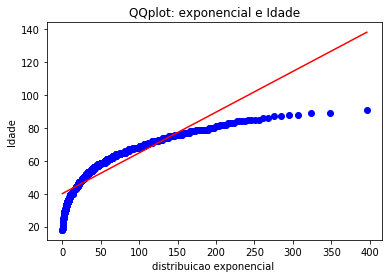

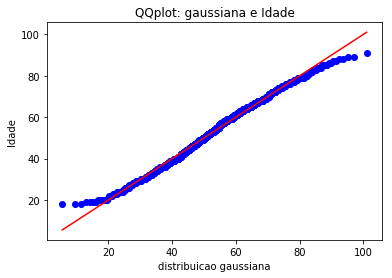

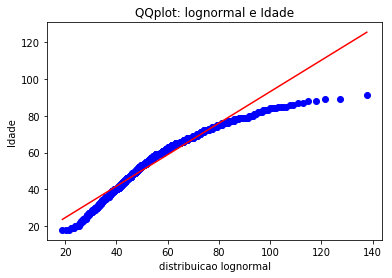

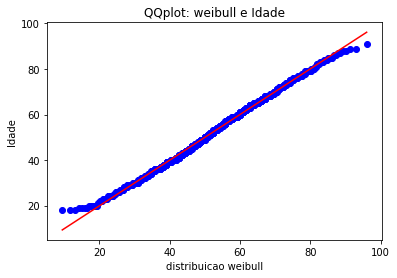




Peso 



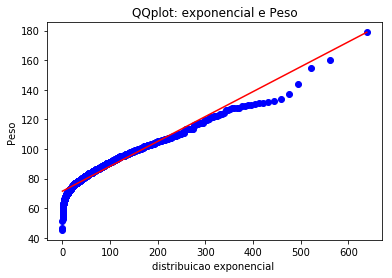

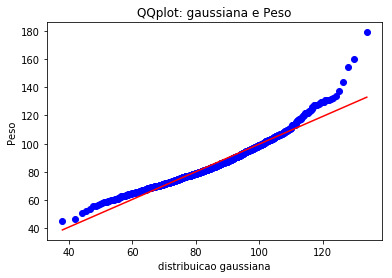

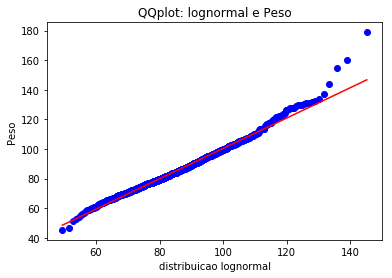

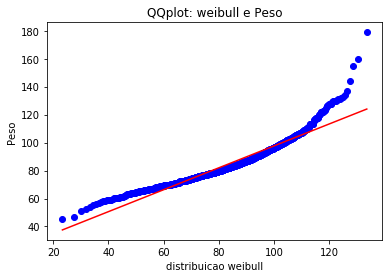




Carga Final 



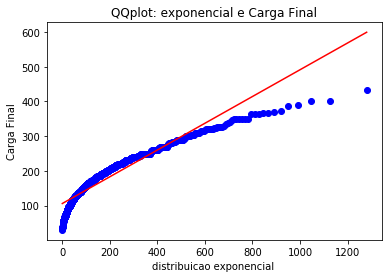

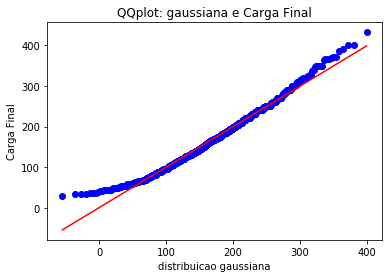

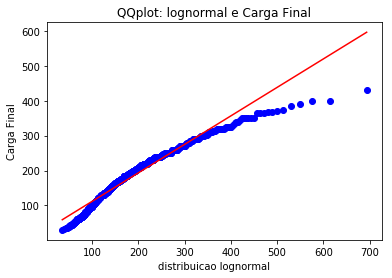

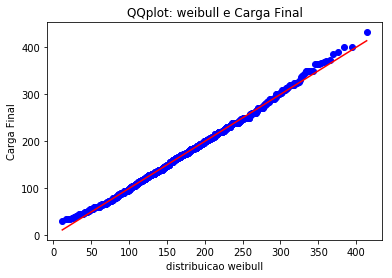




VO2 maximo 



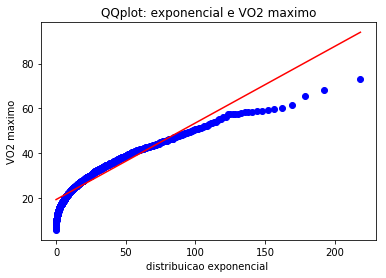

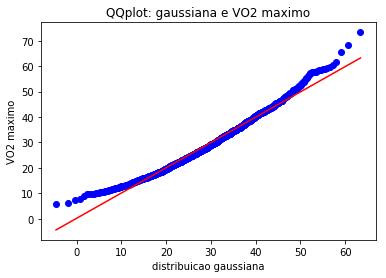

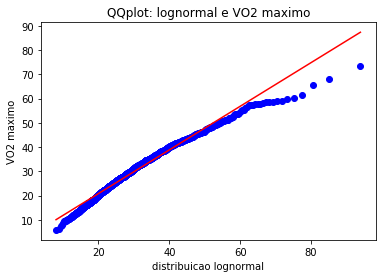

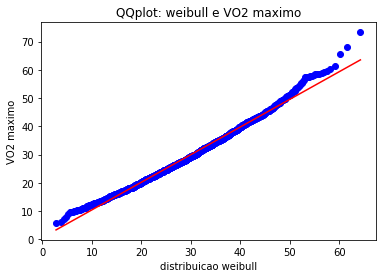

In [205]:
for i in range(0,4):
    x= Data.columns[i]
    print(x, "\n")
    
    #exponencial
    expon_params = stats.expon.fit(Data[x],floc=0)
    stats.probplot(Data[x], dist='expon',sparams=expon_params,plot=plt)
    plt.title('QQplot: exponencial e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao exponencial ')
    plt.savefig('QQplot_exponencial_e_'+x+".png")
    plt.show()
    
    #gaussiana
    norm_params = stats.norm.fit(Data[x])
    stats.probplot(Data[x], dist='norm', sparams=norm_params,plot=plt)
    plt.title('QQplot: gaussiana e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao gaussiana')
    plt.savefig('QQplot_gaussiana_e_'+x+".png")
    plt.show()
    
    #lognormal
    lognorm_params = stats.lognorm.fit(Data[x], floc=0)
    stats.probplot(Data[x], dist='lognorm',sparams=lognorm_params,plot=plt)
    plt.title('QQplot: lognormal e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao lognormal')
    plt.savefig('QQplot_lognormal_e_'+x+ ".png")
    plt.show()
    
    #weibull
    weibull_params = stats.weibull_min.fit(Data[x],floc=0)
    stats.probplot(Data[x], dist='weibull_min',sparams=weibull_params,plot=plt)
    plt.title('QQplot: weibull e '+x)
    plt.ylabel(x)
    plt.xlabel('distribuicao weibull')
    plt.savefig('QQplot_weibull_e_'+x+ ".png")
    plt.show()
    
    
    
    print("\n\n")
    

In [206]:
for i in range (0,4):
    x = Data.columns[i]
    #distribuicao_empirica =sns.kdeplot(Data[x], cumulative=True)
    print("teste de hipotese para variavel ",x,"\n")
    
    #exponencial
    expon_params = stats.expon.fit(Data[x],floc=0)
    ks_expon=stats.kstest(Data[x], 'expon',expon_params)
    print("-Exponencial")
    print("D = ",ks_expon[0])
    print("p_value = ", ks_expon[1],"\n" )
    
    #gaussiana
    print("-Gaussiana")
    norm_params = stats.norm.fit(Data[x])
    ks_gauss=stats.kstest(Data[x], 'norm',norm_params)
    print("D = ",ks_gauss[0])
    print("p_value = ", ks_gauss[1],"\n")
    
    #lognormal
    print("-Lognormal")
    lognorm_params = stats.lognorm.fit(Data[x], floc=0)
    ks_lognorm=stats.kstest(Data[x] ,'lognorm',lognorm_params)
    print("D = ",ks_lognorm[0])
    print("p_value = ", ks_lognorm[1],"\n")
    
    #weibull
    print("-Weibull")
    weibull_params = stats.weibull_min.fit(Data[x],floc=0)
    ks_weibull=stats.kstest(Data[x], 'weibull_min',weibull_params)
    print("D = ",ks_weibull[0])
    print("p_value = ", ks_weibull[1],"\n\n\n\n")
    
    

teste de hipotese para variavel  Idade 

-Exponencial
D =  0.372755615059967
p_value =  0.0 

-Gaussiana
D =  0.04408368872194113
p_value =  0.02039175142102323 

-Lognormal
D =  0.084730460447627
p_value =  9.073029882955552e-08 

-Weibull
D =  0.033037815723893305
p_value =  0.15145170476000502 




teste de hipotese para variavel  Peso 

-Exponencial
D =  0.4954410013455397
p_value =  0.0 

-Gaussiana
D =  0.06661818817785059
p_value =  5.7584235073626644e-05 

-Lognormal
D =  0.032285259002662436
p_value =  0.17003957723543306 

-Weibull
D =  0.1032173331741221
p_value =  2.5226265520927882e-11 




teste de hipotese para variavel  Carga Final 

-Exponencial
D =  0.28651634266099946
p_value =  0.0 

-Gaussiana
D =  0.039233911356943985
p_value =  0.052776560691338625 

-Lognormal
D =  0.08035970386976421
p_value =  4.962162909460943e-07 

-Weibull
D =  0.02457022560625388
p_value =  0.47886304960046483 




teste de hipotese para variavel  VO2 maximo 

-Exponencial
D =  0.334889678

Coeficiente de correlação entre  Idade  e VO2 maximo:  -0.6300720192503418


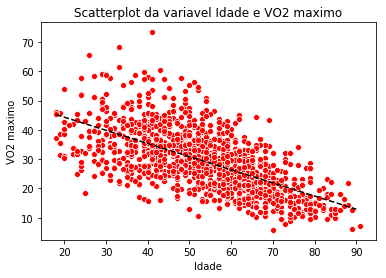

Regressao linear:  [-0.44852097 53.2968391 ]




Coeficiente de correlação entre  Peso  e VO2 maximo:  -0.17440061829630799


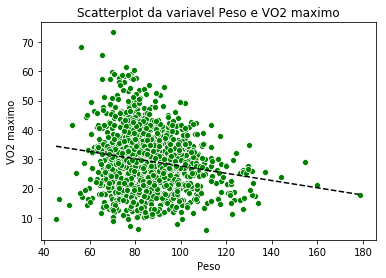

Regressao linear:  [-0.12370517 40.02419091]




Coeficiente de correlação entre  Carga Final  e VO2 maximo:  0.8783256094059619


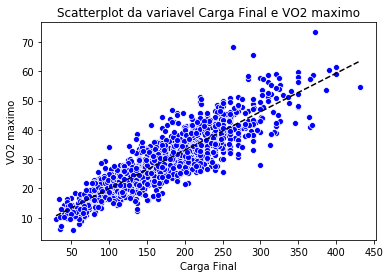

Regressao linear:  [0.13153934 6.73424783]






In [312]:
for i in range(0,3):
    x= Data.columns[i]
    Color_scatter =["Red", "Green", "Blue"]
    
    r=(np.sum((Data[x]-Data[x].mean())*(Data["VO2 maximo"]-Data["VO2 maximo"].mean())))/(np.sqrt(np.sum((Data[x]-Data[x].mean())**2))*np.sqrt(np.sum((Data["VO2 maximo"]-Data["VO2 maximo"].mean())**2)))
    print("Coeficiente de correlação entre ",x, " e VO2 maximo: ", r)
    sns.scatterplot(x=Data[x], y=Data["VO2 maximo"], color=Color_scatter[i])

    a=np.arange(Data[x].min(),Data[x].max())
    regressao_linear= np.polyfit(Data[x], Data["VO2 maximo"],1)
    plt.plot(a, regressao_linear[1] + regressao_linear[0] * a, '--', color="Black")

    plt.title('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.savefig('Scatterplot da variavel '+x+ " e VO2 maximo")
    plt.show()
    print("Regressao linear: ", regressao_linear)
    print("\n\n\n")

In [311]:
prior=[]
low=30.00
high=70.20
hypothesis=[]
likelihood_menos_35 =[]
likelihood_mais_35 =[]


for i in range(0,9):
    hypothesis.append((round(low,1),round(high,1)))
    count_prior=Data[(Data["Carga Final"]>=low) & (Data["Carga Final"]<high)]
    prior.append(count_prior["Carga Final"].count()/Data["Carga Final"].count())
    
    count_likelihood_menos_35 =Data[(Data["Carga Final"]>=low) & (Data["Carga Final"]<high) & (Data["VO2 maximo"]<35.0)]
    likelihood_menos_35.append(count_likelihood_menos_35["VO2 maximo"].count()/count_prior["Carga Final"].count())
    
    count_likelihood_mais_35 =Data[(Data["Carga Final"]>=low) & (Data["Carga Final"]<high) & (Data["VO2 maximo"]>=35.0)]
    likelihood_mais_35.append(count_likelihood_mais_35["VO2 maximo"].count()/count_prior["Carga Final"].count())
    
    low+= 40.2
    high+= 40.2

hypothesis.append((round(low,1),round(high,1)))

count_prior=Data[(Data["Carga Final"]>=low) & (Data["Carga Final"]<=high)]
prior.append(count_prior["Carga Final"].count()/Data["Carga Final"].count())

count_likelihood_menos_35 =Data[(Data["Carga Final"]>=low) & (Data["Carga Final"]<=high) & (Data["VO2 maximo"]<35.0)]
likelihood_menos_35.append(count_likelihood_menos_35["VO2 maximo"].count()/count_prior["Carga Final"].count())
    
count_likelihood_mais_35 =Data[(Data["Carga Final"]>=low) & (Data["Carga Final"]<=high) & (Data["VO2 maximo"]>=35.0)]
likelihood_mais_35.append(count_likelihood_mais_35["VO2 maximo"].count()/count_prior["Carga Final"].count())
    

bayes_numerator_menos_35=[]
bayes_numerator_mais_35=[]
for i in range(0,10):
    bayes_numerator_menos_35.append(prior[i]*likelihood_menos_35[i])
    bayes_numerator_mais_35.append(prior[i]*likelihood_mais_35[i])
    
total_menos_35=np.sum(bayes_numerator_menos_35)
total_mais_35=np.sum(bayes_numerator_mais_35)

posterior_menos_35=[]
posterior_mais_35 =[]

for i in range(0,10):
    posterior_menos_35.append(bayes_numerator_menos_35[i]/total_menos_35)
    posterior_mais_35.append(bayes_numerator_mais_35[i]/total_mais_35)

    
    
predict=[]
for i in range(0,10):
    predict.append(posterior_menos_35[i]*likelihood_mais_35[i])

prob=np.sum(predict)
    
inference_menos_35= pd.DataFrame({"hypothesis":hypothesis,
                              "prior":prior,
                              "likelihood" : likelihood_menos_35,
                              "Bayes Num":bayes_numerator_menos_35,
                              "Posterior":posterior_menos_35})

inference_mais_35= pd.DataFrame({"hypothesis":hypothesis,
                              "prior":prior,
                              "likelihood" :likelihood_mais_35,
                              "Bayes Num":bayes_numerator_mais_35,
                              "Posterior":posterior_mais_35})

inference_cond= pd.DataFrame({"hypothesis":hypothesis,
                              "prior":prior,
                              "likelihood(<35)" :likelihood_menos_35,
                              "Bayes Num1":bayes_numerator_mais_35,
                              "Posterior 1": posterior_menos_35,
                              "likelihood(>=35)" : likelihood_mais_35,
                            " prediction": predict})

print("hipotese que VO2 máximo esta abaixo da média 35\n\n",inference_menos_35 ,"\n")
print(total_menos_35,"\n\n\n\n")
print("hipotese que VO2 máximo esta acima da média 35\n\n",inference_mais_35,"\n")
print(total_mais_35,"\n\n\n\n")
print("hipotese que VO2 máximo esta acima da média 35, dado que antes estava abaixo da media \n\n",inference_cond,"\n")
print(total_menos_35)
print("prob: ", prob,"\n\n\n\n")

hipotese que VO2 máximo esta abaixo da média 35

        hypothesis     prior  likelihood  Bayes Num  Posterior
0    (30.0, 70.2)  0.071672    1.000000   0.071672   0.099291
1   (70.2, 110.4)  0.132253    1.000000   0.132253   0.183215
2  (110.4, 150.6)  0.208191    0.987705   0.205631   0.284870
3  (150.6, 190.8)  0.209044    0.848980   0.177474   0.245863
4  (190.8, 231.0)  0.182594    0.588785   0.107509   0.148936
5  (231.0, 271.2)  0.119454    0.200000   0.023891   0.033097
6  (271.2, 311.4)  0.041809    0.061224   0.002560   0.003546
7  (311.4, 351.6)  0.024744    0.034483   0.000853   0.001182
8  (351.6, 391.8)  0.007679    0.000000   0.000000   0.000000
9  (391.8, 432.0)  0.001706    0.000000   0.000000   0.000000 

0.7218430034129693 




hipotese que VO2 máximo esta acima da média 35

        hypothesis     prior  likelihood  Bayes Num  Posterior
0    (30.0, 70.2)  0.071672    0.000000   0.000000   0.000000
1   (70.2, 110.4)  0.132253    0.000000   0.000000   0.000000
2  (110